In [1]:
import torch
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pprint

import pycuda.autoinit

In [2]:
os.chdir(os.path.split(os.getcwd())[0])

In [3]:
cfg = yaml.load(open('config/models.yaml', 'r'), Loader=yaml.FullLoader)

#### image functions

In [4]:
def plot_imgs(imgs_lst, col=5, row=5):
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = col
    rows = row
    for i in range(1, len(imgs_lst)+1):
        img = imgs_lst[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

#### load images

In [5]:
imgs = [cv2.imread('assets/test_im/FP631_34938.jpg'), 
        cv2.imread('assets/test_im/LA7937_1558.jpg'), 
        cv2.imread('assets/test_im/edit.jpg'), 
        cv2.imread('assets/test_im/nocar.jpg')]

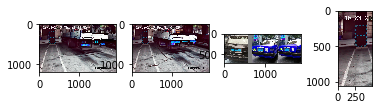

In [6]:
plot_imgs(imgs)

### LPR class

In [7]:
from models.lpr import LPR

In [8]:
lpr = LPR(cfg, use_trt={
    'plate_detector':True,
    'segmentator':True,
    'char_recognizer':False
})

In [9]:
lpr.predict(imgs)

[[],
 [],
 [{'plate': {'coords': (150, 350, 442, 427), 'confidence': 0.99853515625},
   'plate_num': {'numbers': 'TVB', 'confidence': 0.9999614953994751},
   'status': 'success'},
  {'plate': {'coords': (816, 336, 962, 422), 'confidence': 0.9755859375},
   'plate_num': {'numbers': 'TAX1', 'confidence': 0.9999735355377197},
   'status': 'success'}],
 []]

#### Dev

In [7]:
import cv2

from models.car_locator import CarLocator
from models.plate_detector import PlateDetector
from models.segmentator import Segmentator
from models.char_recognizer import CharRecognizer

In [8]:
class Self():
    def __init__(self):
        pass
self = Self()

In [9]:
self.car_locator = CarLocator(cfg['car_locator'])
self.detector = PlateDetector(cfg['plate_detector'])
self.segmentator = Segmentator(cfg['segmentator'])
self.recognizer = CharRecognizer(cfg['char_recognizer'])

self.pad_x = cfg['lpr']['pad_x']
self.pad_y = cfg['lpr']['pad_y']

In [10]:
batch_preds = self.detector.predict(imgs)

In [11]:
batch_preds

[None,
 array([[1.2550642e+03, 4.2941147e+02, 1.3862781e+03, 4.6652426e+02,
         5.2103096e-01, 9.9927360e-01, 0.0000000e+00]], dtype=float32),
 array([[1.8151875e+02, 3.5132642e+02, 4.0846558e+02, 4.2748892e+02,
         9.9753785e-01, 9.9999619e-01, 0.0000000e+00],
        [1.4830007e+03, 3.3185983e+02, 1.5931763e+03, 3.9984235e+02,
         8.5150713e-01, 9.9930716e-01, 0.0000000e+00],
        [8.2238654e+02, 3.3491275e+02, 9.5347034e+02, 4.1436972e+02,
         5.3305078e-01, 9.9854553e-01, 0.0000000e+00]], dtype=float32),
 None]

In [13]:
for pred in batch_preds[2]:
    print(pred)

[181.51875    351.32642    408.46558    427.48892      0.99753785
   0.9999962    0.        ]
[1.4830007e+03 3.3185983e+02 1.5931763e+03 3.9984235e+02 8.5150713e-01
 9.9930716e-01 0.0000000e+00]
[8.2238654e+02 3.3491275e+02 9.5347034e+02 4.1436972e+02 5.3305078e-01
 9.9854553e-01 0.0000000e+00]


In [39]:
x1,y1,x2,y2 = batch_preds[1][0][:4].astype('int')
plates = [imgs[1][y1:y2,x1:x2]]

In [41]:
seg = self.segmentator.predict(plates)
seg

[[array([ 7,  8, 28, 37]),
  array([26,  9, 48, 37]),
  array([61,  8, 82, 37]),
  array([78,  7, 97, 37]),
  array([ 95,   7, 116,  36]),
  array([113,   5, 131,  36])]]

In [44]:
np.stack(seg[0])

array([[  7,   8,  28,  37],
       [ 26,   9,  48,  37],
       [ 61,   8,  82,  37],
       [ 78,   7,  97,  37],
       [ 95,   7, 116,  36],
       [113,   5, 131,  36]])